In [1]:
%matplotlib inline
from pjr import *

pjr.py complete
Help on function findNiceContours in module pjr:

findNiceContours(data, nlevs=None, rmClev=None, sym=None, verbose=None)
    Find Nice Contours
    data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
    nlevs = approximate number of contour levels to return (default 10)
    rmClev = if defined delete the contour level near this value
    sym = if defined make the contour intervals symmetric about zero
    verbose = if defined, print out some info to help debug



ax1 AxesSubplot(0.125,0.125;0.775x0.755)


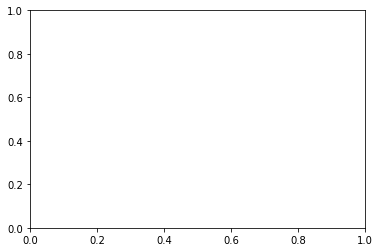

In [2]:
ax1 = plt.gca()
print "ax1", ax1

In [3]:

#clevs = findNiceContours(Txav)
clevs = findNiceContours(np.array([-9, 21.]),rmClev=0.,verbose=1)
print "fNC clevs", clevs

zmin, zmax -9.0 21.0
zinc 3.33333333333
pow 0
cints [  0.1   0.2   0.5   1.    2.    5.   10.   20. ]
nlevsout [ 300.   150.    60.    30.    15.     6.     3.     1.5]
f1 [ 291.   141.    51.    21.     6.     3.     6.     7.5]
f2 (array([5]),)
nlevbest, cintsbest 5 5.0
f3 -1.8
ninc, zminout, zmaxout 6 -5.0 20.0
f4 [ 0.25  0.    0.25  0.5   0.75  1.  ]
alist 1
zlist (array([0, 2, 3, 4, 5]),)
list of nonzero contour levels (array([0, 2, 3, 4, 5]),)
fNC clevs [ -5.   5.  10.  15.  20.]


In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
fname = "/Users/d3x345/Desktop/NetCDF_files/vd05_ANN_climo.nc"
g2 = cdms2.open(fname);
varlist = g2.listvariables();
dims = g2.listdimension();
print dims;
print "\n".join(s for s in varlist if 'Z' in s) # find vars that contain 'Z'
#print varlist;

T =  g2('T',squeeze=1)            # extract fields, remove dimensions length one


lat2 = g2['lat']
lon2 = g2['lon']
lev2 = g2['lev']
#print "T.info()", T.info()

Z3 = g2('Z3',squeeze=1)
#print "Z3.info",Z3.info()
print "Z3.range",Z3.min(),Z3.max()


Txav = cdutil.averager(T,axis="x")
print "Txav=", Txav.info()

U =  g2('U',squeeze=1)            # extract fields, remove dimensions length one
Uxav = cdutil.averager(U,axis="x")

# print "LANDFRAC2av=", cdutil.averager(LANDFRAC2,axis="xy",weights="weighted")


['cosp_htmisr', 'nbnd', 'cosp_tau', 'lev', 'cosp_prs', 'cosp_scol', 'slat', 'lon', 'cosp_sza', 'cosp_ht', 'ilev', 'cosp_sr', 'time', 'lat', 'slon', 'chars', 'cosp_tau_modis']
BCFREZDEP
ZM_CLUBB
Z3
BCFREZCNT
LINOZ_SZA
LINOZ_SSO3
DSTFREZDEP
LINOZ_DO3_PSC
ZT_CLUBB
DSTFREZCNT
LINOZ_O3CLIM
BCFREZIMM
DSTFREZIMM
LINOZ_O3COL
LINOZ_DO3
Z3.range -7.53604 64933.2
Txav=*** Description of Slab variable_9 ***
id: variable_9
shape: (72, 192)
filename: 
missing_value: 1e+20
comments: 
grid_name: N/A
grid_type: N/A
time_statistic: 
long_name: Temperature
units: K
tileIndex: None
mdims: [9]
cell_methods: time: mean
No grid present.
** Dimension 1 **
   id: lev
   Designated a level axis.
   units:  hPa
   Length: 72
   First:  0.123825413056
   Last:   998.496439492
   Other axis attributes:
      realtopology: linear
      positive: down
      formula_terms: a: hyam b: hybm p0: P0 ps: PS
      long_name: hybrid level at midpoints (1000*(A+B))
      standard_name: atmosphere_hybrid_sigma_pressure_coordi

In [30]:
from timeit import default_timer as timer

ps = g2('PS',squeeze=1)
hyam = g2('hyam',squeeze=1)
hybm = g2('hybm',squeeze=1)
eta = hyam+hybm
print "eta", eta
niceeta = findNiceContours(eta*1010.0,20,rmClev=0.)
print "niceeta", niceeta


eta [  1.23825413e-04   1.82829236e-04   2.69948862e-04   3.98581704e-04
   5.88509147e-04   8.68938570e-04   1.28299491e-03   1.89435248e-03
   2.79702694e-03   4.12983316e-03   5.96844937e-03   8.37740438e-03
   1.14737872e-02   1.53339382e-02   1.99963380e-02   2.54446965e-02
   3.15932513e-02   3.83662831e-02   4.56711979e-02   5.33095614e-02
   6.10151817e-02   6.84763902e-02   7.53553359e-02   8.19462751e-02
   8.89105431e-02   9.64666734e-02   1.04664967e-01   1.13560001e-01
   1.23210991e-01   1.33682180e-01   1.45043266e-01   1.57369878e-01
   1.70744080e-01   1.85254902e-01   2.00998940e-01   2.18080997e-01
   2.36614787e-01   2.56723686e-01   2.78541558e-01   3.02213640e-01
   3.27897506e-01   3.55764129e-01   3.85999024e-01   4.18803463e-01
   4.54395814e-01   4.92468574e-01   5.31639531e-01   5.70624903e-01
   6.08643774e-01   6.45319968e-01   6.80498044e-01   7.13704638e-01
   7.44474829e-01   7.72362838e-01   7.96952750e-01   8.17868823e-01
   8.35095171e-01   8.49661249

In [28]:
from timeit import default_timer as timer
start = timer()
P = cdutil.reconstructPressureFromHybrid (ps,hyam,hybm,1.e5)
P = P/100.
P.units = "hPa"
TP2 = cdutil.logLinearInterpolation(T,P,levels=niceeta)
print TP2.info()
# ...
end = timer()
print(end - start) # Time in seconds, e.g. 5.38091952400282print ps.units, ps.max()


*** Description of Slab T ***
id: T
shape: (20, 192, 288)
filename: 
missing_value: 1e+20
comments: 
grid_name: <None>
grid_type: generic
time_statistic: 
long_name: Temperature
units: K
tileIndex: None
mdims: [9]
cell_methods: time: mean
Grid has Python id 0x182e330e50.
Gridtype: generic
Grid shape: (192, 288)
Order: yx
** Dimension 1 **
   id: plev
   Designated a level axis.
   units:  hPa
   Length: 20
   First:  50.0
   Last:   1000.0
   Other axis attributes:
      axis: Z
      realtopology: linear
   Python id:  0x182e34a910
** Dimension 2 **
   id: lat
   Designated a latitude axis.
   units:  degrees_north
   Length: 192
   First:  -89.7643979058
   Last:   89.7643979058
   Other axis attributes:
      realtopology: linear
      long_name: latitude
      standard_name: latitude
      axis: Y
   Python id:  0x182e34ac10
** Dimension 3 **
   id: lon
   Designated a longitude axis.
   units:  degrees_east
   Length: 288
   First:  0.0
   Last:   358.75
   Other axis attributes:


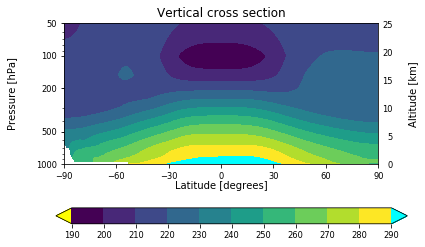

In [29]:
TP2xav = cdutil.averager(TP2,axis="x")
levsp = TP2xav.getAxis(0)
plotZMf(TP2xav, lat2, levsp)

text goes here
$$
a = \sqrt b^c
$$

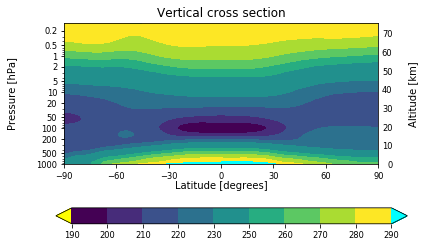

In [8]:
fig = plt.figure()
plt.tight_layout(pad=0.05, w_pad=0.0, h_pad=0.1)
axest = fig.add_subplot(111)
#plotZMf(Txav, lat2, lev2, fig=fig, axesa=axest) # works
#plotZMf(Txav, lat2, lev2, fig=fig) #works
plotZMf(Txav, lat2, lev2, plotOpt={"rmClev":240.,'colorbar':'bot'}) #works

range of Dxav -18.9640930361 103.332462969


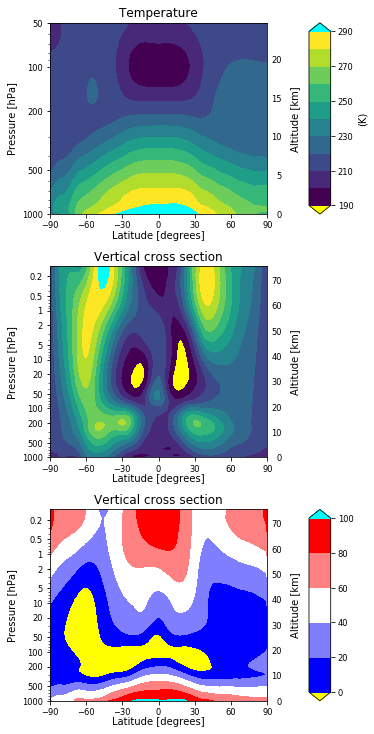

In [9]:

fig = plt.figure(figsize=(5., 10.), facecolor='white')
axest = fig.add_subplot(311)
axesm = fig.add_subplot(312)
axesb = fig.add_subplot(313)
#plotOpt = {'levels':np.arange(170.,330.,10.),'units':'K','title':'Temperature'} #,
#         'ybot':800.,'ytop':500.}
#plotOpt = {}
axesa = axest
Dxav = Txav-Uxav-200
print "range of Dxav", Dxav.min(), Dxav.max()
plotOpt={'title':'Temperature','colorbar':'right','units':'(K)','ybot':1000.,'ytop':50.}
# plotOpt={'title':'Temperature','clevs':np.arange(170.,270.,10.)}
#print "plotOpt",plotOpt
plotZMf(Txav, lat2, lev2, plotOpt=plotOpt, axesa=axest)
#plotZMf(Dxav, lat2, lev2, fig=fig) # works
#plotZMf(Dxav, lat2, lev2, axesa=axesm) # works
#plotZMf(Txav, lat2, lev2, axesa=axest, plotOpt={'title':'Temperature'},fig=fig)
plotZMf(Uxav, lat2, lev2, plotOpt={'colorbar':'rightnd','Units':'K'}, axesa=axesm,fig=fig)
cmap = diverge_map()
plotZMf(Dxav, lat2, lev2, axesa=axesb,fig=fig,plotOpt={'cmap':cmap,'colorbar':'right'})
plt.tight_layout(pad=0, w_pad=0.0, h_pad=1.0)

# show plot
# plt.show()
plt.savefig("test.pdf",type="pdf")